<a href="https://colab.research.google.com/github/songwoojin04/machine2/blob/main/4week/DL_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

cancer = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/4주차/breast_cancer.csv")

X = cancer.drop("label", axis=1)
y = cancer["label"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

Y = pd.get_dummies(y).values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model = models.Sequential([
    layers.Input(shape=(X.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(Y.shape[1], activation='softmax')
])


model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=25,
    batch_size=16,
    verbose=1
)

Epoch 1/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.5164 - loss: 0.7778 - val_accuracy: 0.9670 - val_loss: 0.2961
Epoch 2/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9434 - loss: 0.2656 - val_accuracy: 0.9780 - val_loss: 0.1547
Epoch 3/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9612 - loss: 0.1596 - val_accuracy: 0.9780 - val_loss: 0.1020
Epoch 4/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9684 - loss: 0.1003 - val_accuracy: 0.9890 - val_loss: 0.0763
Epoch 5/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9775 - loss: 0.0998 - val_accuracy: 0.9890 - val_loss: 0.0643
Epoch 6/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9842 - loss: 0.0652 - val_accuracy: 0.9780 - val_loss: 0.0559
Epoch 7/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9844 - loss: 0.0460 - val_accuracy: 0.9890 - val_loss: 0.0517
Epoch 8/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9806 - loss: 0.0582 - val_accuracy: 0.9890 - val_lo

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


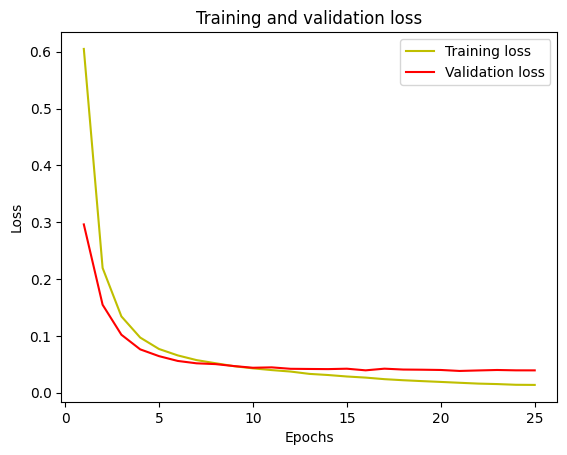

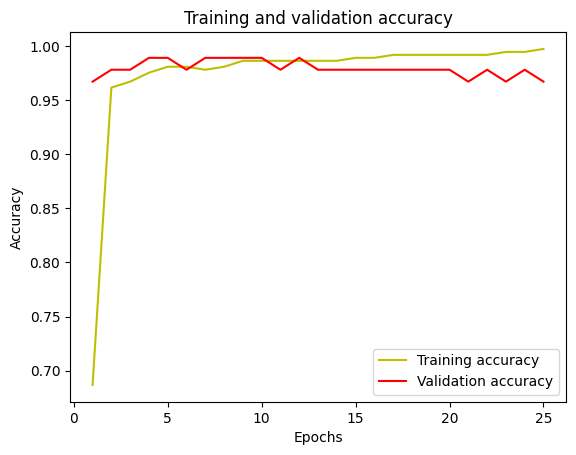

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        47
           1       0.98      0.96      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

[[46  1]
 [ 3 64]]


In [5]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(classification_report(y_test_class, y_pred_class, zero_division=0))
print(confusion_matrix(y_test_class, y_pred_class))